In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import IPython.display as ipd  # To play sound in the notebook
import os
from tqdm import tqdm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from pydub import AudioSegment, effects
import noisereduce as nr

In [2]:
RAVDESS = "Data/RAVDESS/audio_speech_actors_01-24/"
TESS = "Data/TESS/"
EMOTIONS = {
    1: 'neutral',
    2: 'calm',
    3: 'happy',
    4: 'sad',
    5: 'angry',
    6: 'fear',
    7: 'disgust',
    8: 'surprise'
}
SAMPLE_RATE = 48000

In [11]:
RAVDESS_folder_names = os.listdir(RAVDESS)
RAVDESS_folder_names.sort()

file_emotions = []
file_gender = []
file_intensity = []
file_paths = []

for i in RAVDESS_folder_names:
    if os.path.isdir(RAVDESS + i):
        file_names = os.listdir(RAVDESS + i)

        for file in file_names:
            parts = file.split('.')[0].split('-')
            file_emotions.append(EMOTIONS[int(parts[2])])
            # file_intensity.append(int(parts[3]))
            if int(parts[6]) % 2 == 0:
                file_gender.append('female')
            else:
                file_gender.append('male')
            file_paths.append(RAVDESS + i + '/' + file)
for file in os.listdir(TESS):
    parts = file.split('.')[0].split('_')
    if parts[2] == 'ps':
        parts[2] = 'surprise'
    file_emotions.append(parts[2])
    if parts[0] == 'OAF':
        file_gender.append('male')
    else:
        file_gender.append('female')

    file_paths.append(TESS + file)
# print(file_emotions, file_gender, file_intensity, file_paths, sep="\n")

In [12]:
dataset = pd.DataFrame({
    'path': file_paths,
    'gender': file_gender,
    'emotion': file_emotions
})
# dataset['emotion'] = dataset['emotion'].map(EMOTIONS)
print('Shape=>', dataset.shape)
dataset.head(50)

Shape=> (4240, 3)


path gender   emotion
0   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise
1   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise
2   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry
3   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear
4   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear
5   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry
6   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust
7   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad
8   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad
9   Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust
10  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy
11  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy
12  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm
13  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   neutral
14  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm
15  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy
16  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy
17  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm
18  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm
19  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   neutral
20  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise
21  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise
22  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear
23  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry
24  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry
25  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear
26  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad
27  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust
28  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust
29  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad
30  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm
31  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   neutral
32  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      calm
33  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy
34  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     happy
35  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise
36  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise
37  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust
38  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad
39  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad
40  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust
41  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry
42  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear
43  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male      fear
44  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male     angry
45  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise
46  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male  surprise
47  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male       sad
48  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust
49  Data/RAVDESS/audio_speech_actors_01-24/Actor_0...   male   disgust

In [13]:
dataset.tail(10)

path  gender   emotion
4230  Data/TESS/OAF_white_disgust.wav    male   disgust
4231        Data/TESS/OAF_love_ps.wav    male  surprise
4232        Data/TESS/OAF_met_sad.wav    male       sad
4233        Data/TESS/YAF_vine_ps.wav  female  surprise
4234      Data/TESS/OAF_pearl_sad.wav    male       sad
4235       Data/TESS/OAF_rain_sad.wav    male       sad
4236      Data/TESS/OAF_kill_fear.wav    male      fear
4237   Data/TESS/OAF_vine_neutral.wav    male   neutral
4238     Data/TESS/OAF_hate_happy.wav    male     happy
4239    Data/TESS/OAF_cab_disgust.wav    male   disgust

# Exploratry Data Analysis (EDA)

In [14]:
dataset['gender'].value_counts()

male      2120
female    2120
Name: gender, dtype: int64

In [15]:
dataset['emotion'].value_counts()

surprise    592
angry       592
fear        592
disgust     592
sad         592
happy       592
neutral     496
calm        192
Name: emotion, dtype: int64

In [16]:
dataset['emotion'].value_counts(normalize=True) * 100

surprise    13.962264
angry       13.962264
fear        13.962264
disgust     13.962264
sad         13.962264
happy       13.962264
neutral     11.698113
calm         4.528302
Name: emotion, dtype: float64

In [17]:
male_sample = []
female_sample = []
for i in EMOTIONS.values():
    male_sample.append(dataset[dataset['emotion'] == i][
        dataset['gender'] == 'male']['path'].reset_index(drop=True)[0])
    female_sample.append(dataset[dataset['emotion'] == i][
        dataset['gender'] == 'female']['path'].reset_index(drop=True)[0])
print(male_sample)
print(female_sample)

['Data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-01-01-02-02-01.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-02-02-01-01-01.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-03-02-02-02-01.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-04-01-01-02-01.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-05-01-02-01-01.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-06-01-02-02-01.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-07-01-01-01-01.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_01/03-01-08-02-02-01-01.wav']
['Data/RAVDESS/audio_speech_actors_01-24/Actor_02/03-01-01-01-02-02-02.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_02/03-01-02-02-01-01-02.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_02/03-01-03-02-02-02-02.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_02/03-01-04-01-01-02-02.wav', 'Data/RAVDESS/audio_speech_actors_01-24/Actor_02/03-01-05-01-02-01-02.wav', 'Data/RAVD

/var/folders/y6/4njssq5s2_764zsxh2lpvlvm0000gn/T/ipykernel_3815/1306359228.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_sample.append(dataset[dataset['emotion'] == i][
/var/folders/y6/4njssq5s2_764zsxh2lpvlvm0000gn/T/ipykernel_3815/1306359228.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_sample.append(dataset[dataset['emotion'] == i][


In [18]:
for emotion, path in zip(EMOTIONS.values(), male_sample):
    signal, sr = librosa.load(path, sr=SAMPLE_RATE)
    print(f"Emotion:{emotion}")
    # Play the Audio
    ipd.display(ipd.Audio(signal, rate=SAMPLE_RATE))

Emotion:neutral


Emotion:calm


Emotion:happy


Emotion:sad


Emotion:angry


Emotion:fear


Emotion:disgust


Emotion:surprise


In [19]:
for emotion, path in zip(EMOTIONS.values(), female_sample):
    signal, sr = librosa.load(path, sr=SAMPLE_RATE)
    print(f"Emotion:{emotion}")
    # Play the Audio
    ipd.display(ipd.Audio(signal, rate=SAMPLE_RATE))

Emotion:neutral


Emotion:calm


Emotion:happy


Emotion:sad


Emotion:angry


Emotion:fear


Emotion:disgust


Emotion:surprise


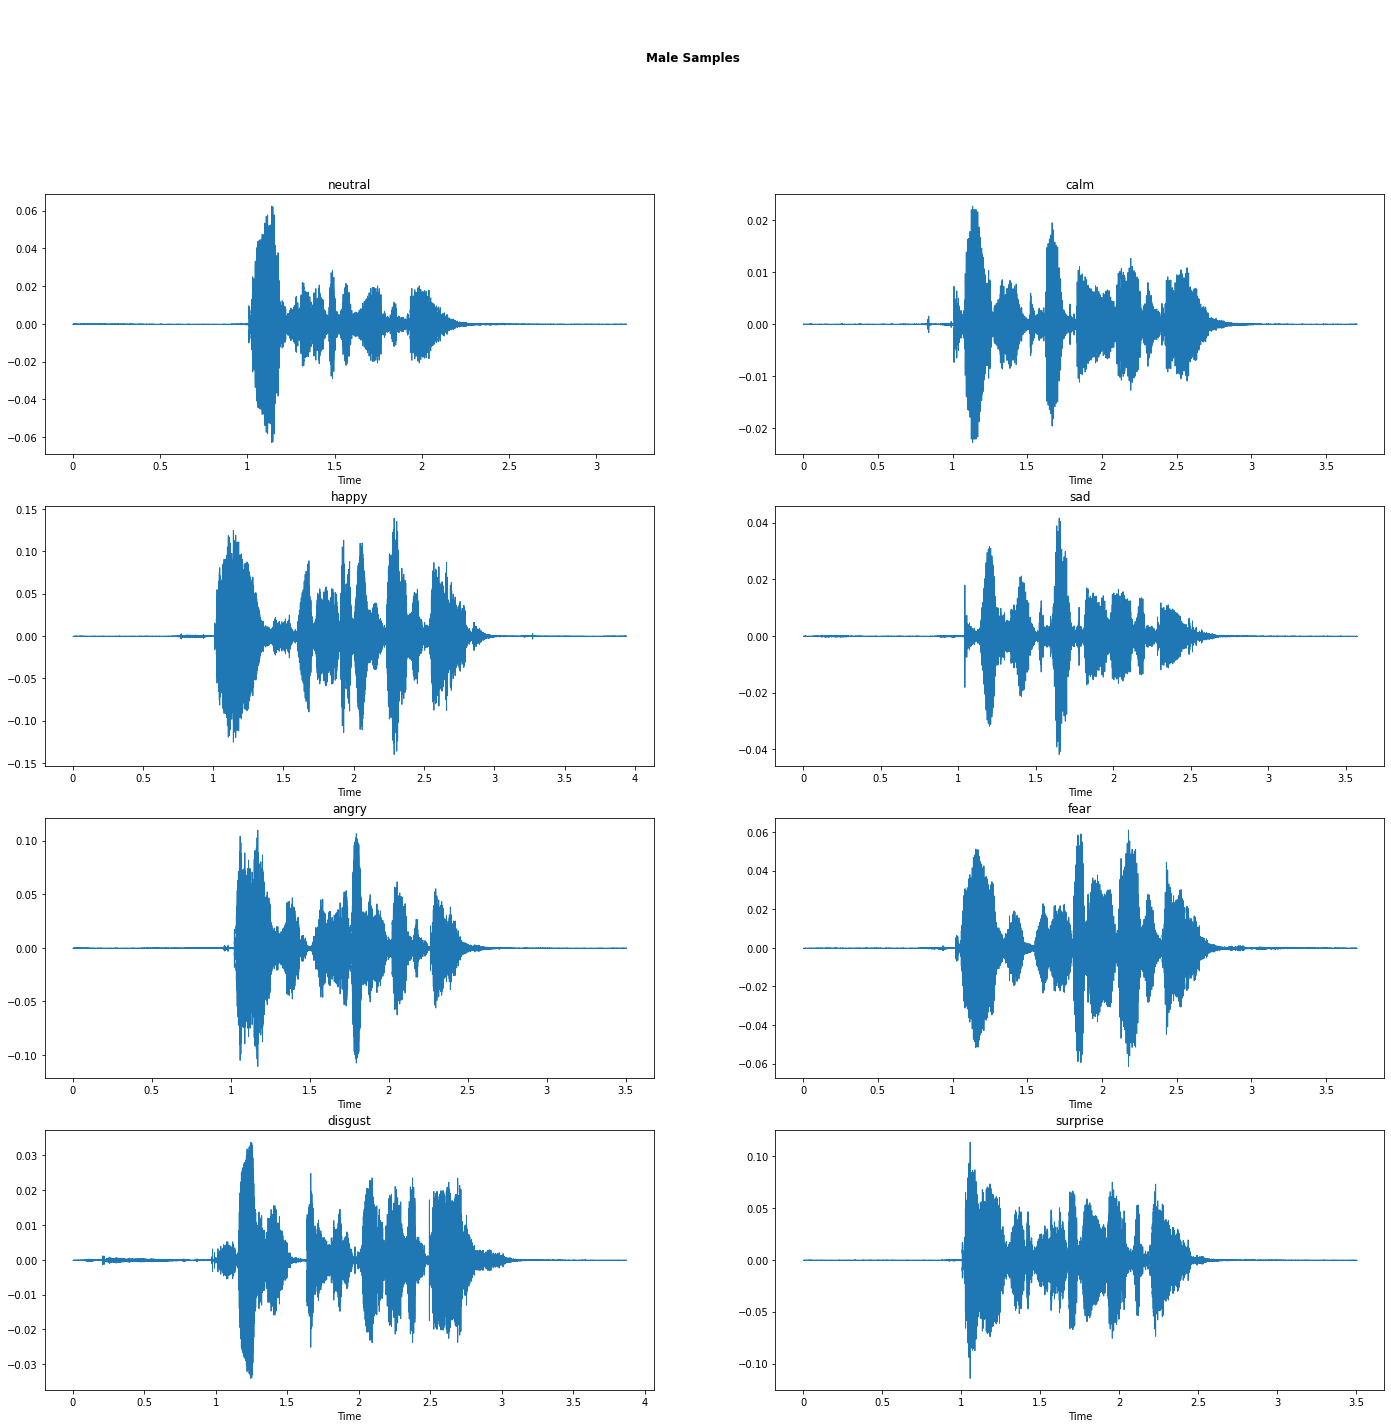

In [20]:
fig, axes = plt.subplots(4, 2, figsize=(24, 22))
plt.suptitle("\n\n\nMale Samples", va='center', fontweight="bold")
for ax, emotion, path in zip(axes.flatten(), EMOTIONS.values(), male_sample):
    signal, sr = librosa.load(path, sr=SAMPLE_RATE)
    librosa.display.waveshow(signal, sr=SAMPLE_RATE, ax=ax)
    ax.set(title=emotion)

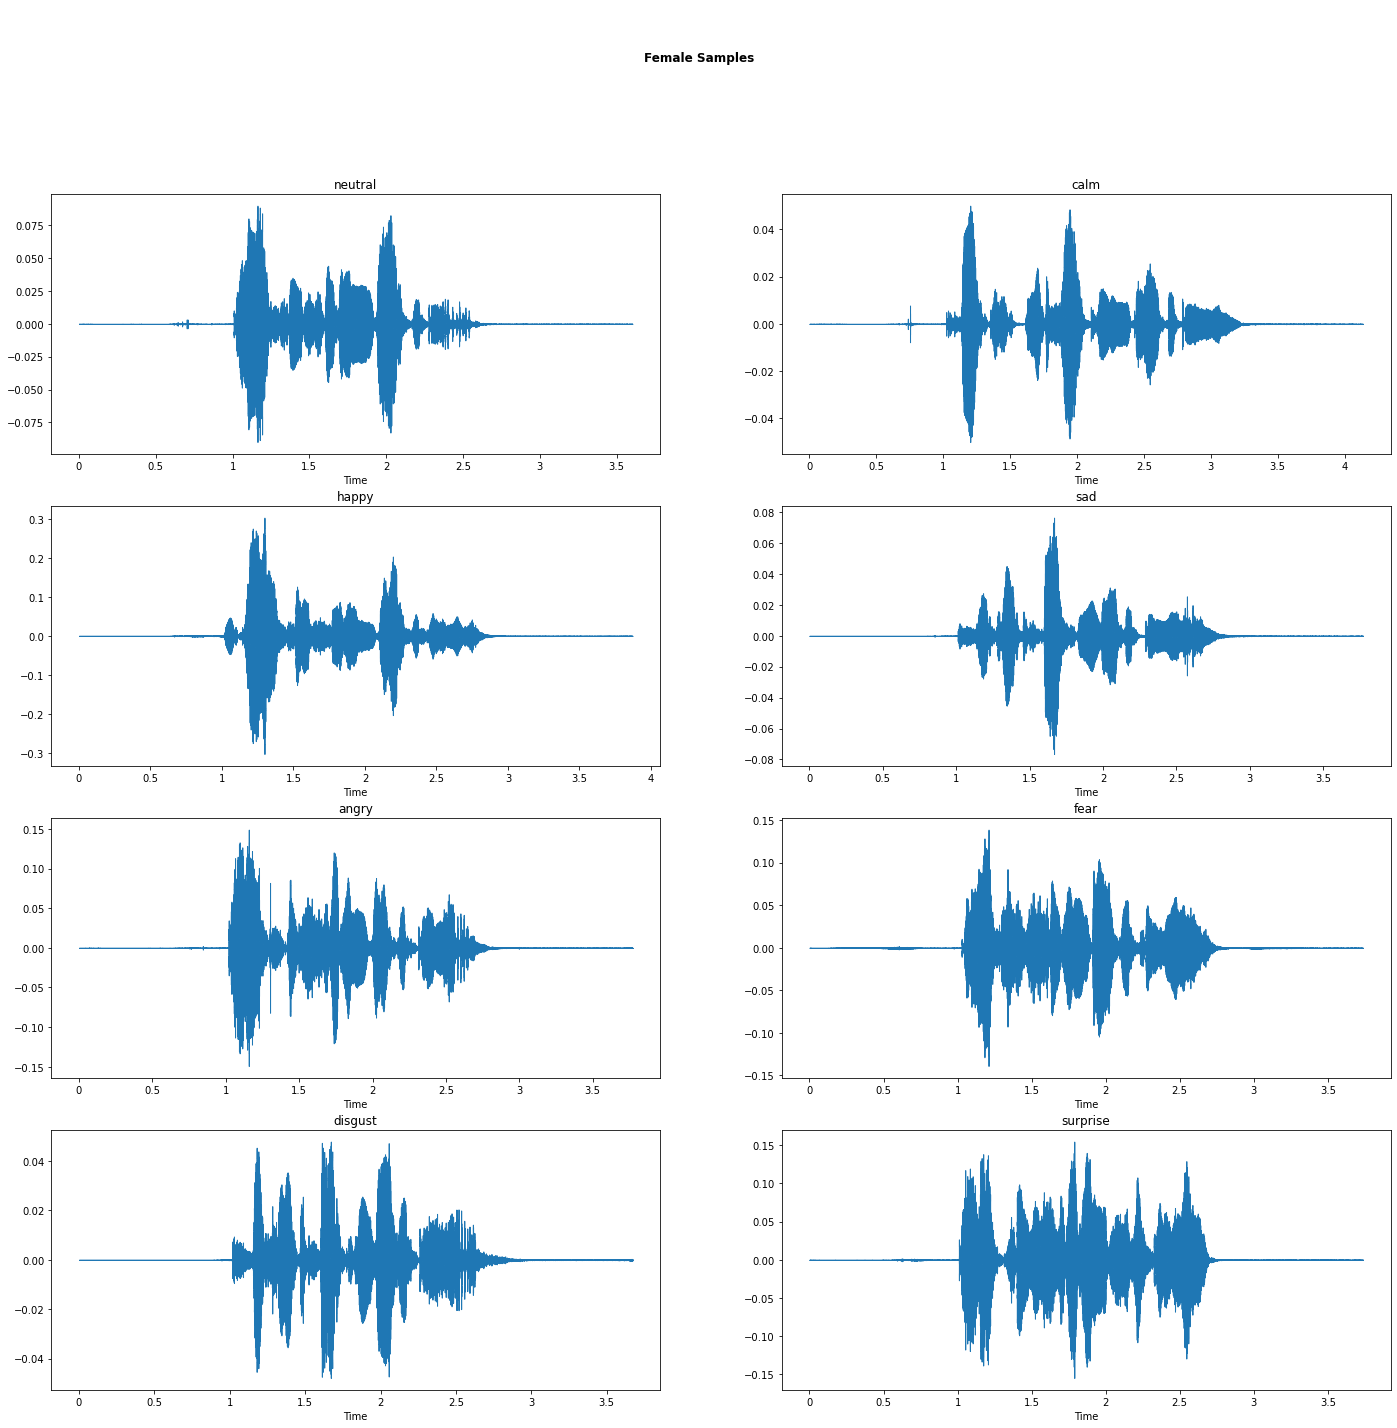

In [21]:
fig, axes = plt.subplots(4, 2, figsize=(24, 22))
plt.suptitle("\n\n\nFemale Samples", va='center', fontweight="bold")
for ax, emotion, path in zip(axes.flatten(), EMOTIONS.values(), female_sample):
    signal, sr = librosa.load(path, sr=SAMPLE_RATE)
    librosa.display.waveshow(signal, sr=SAMPLE_RATE, ax=ax)
    ax.set(title=emotion)

# Preprocessing For Single File

Sample Rate :  48000


/var/folders/y6/4njssq5s2_764zsxh2lpvlvm0000gn/T/ipykernel_3815/196915208.py:7: FutureWarning: Pass sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(ats, sr)


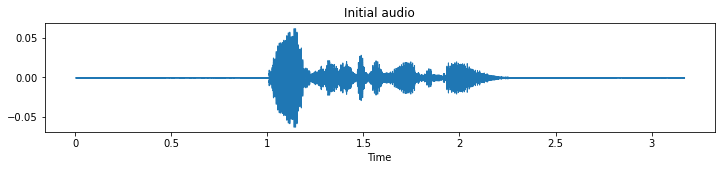

In [22]:
#Taking an audio file form male_sample to perform preprocessing to know the audio data more
path = male_sample[0]
rawsound = AudioSegment.from_file(path)
ats, sr = librosa.load(path, sr=None)
print("Sample Rate : ", sr)
plt.figure(figsize=(12, 2))
librosa.display.waveshow(ats, sr)
plt.title('Initial audio')

rawsound

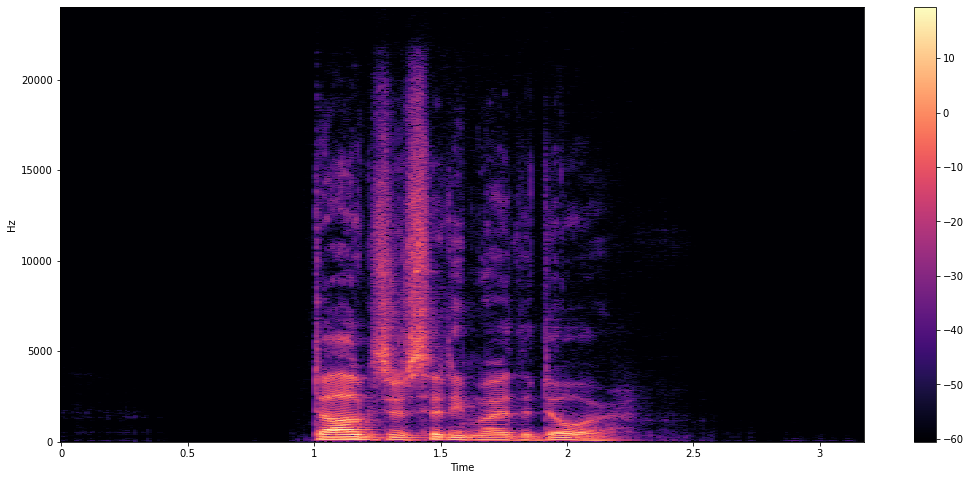

In [23]:
X = librosa.stft(ats)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(18, 8))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

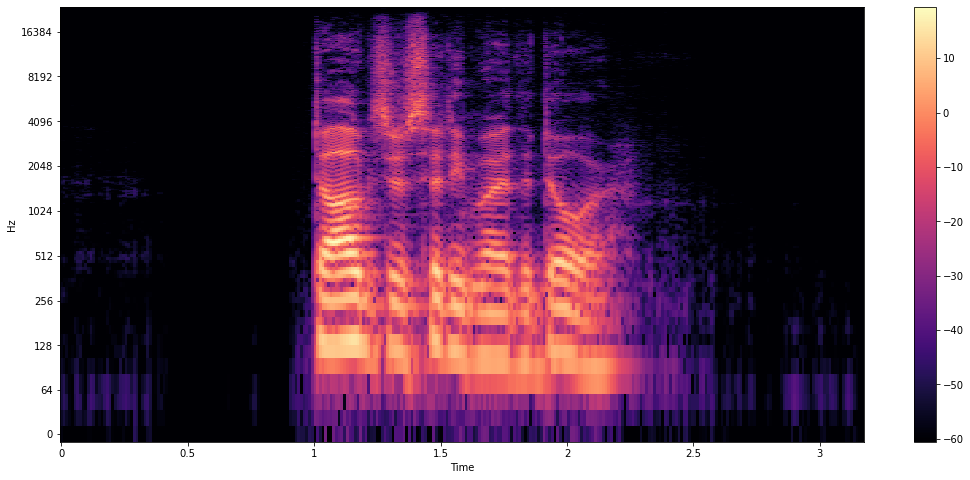

In [24]:
plt.figure(figsize=(18, 8))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

/var/folders/y6/4njssq5s2_764zsxh2lpvlvm0000gn/T/ipykernel_3815/3066147956.py:8: FutureWarning: Pass sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(normal_audio, sr)


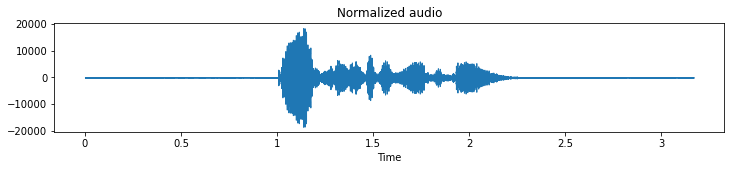

In [25]:
# Normalizing the audio to give audio boost to quiter part by giving +5.0 dBFS (decibels relative to full scale)
# and transforing normalized audio to Numpy array
normalizedsound = effects.normalize(rawsound, headroom=5.0)
normal_audio = np.array(normalizedsound.get_array_of_samples(),
                        dtype='float32')

plt.figure(figsize=(12, 2))
librosa.display.waveshow(normal_audio, sr)
plt.title('Normalized audio')

normalizedsound

/var/folders/y6/4njssq5s2_764zsxh2lpvlvm0000gn/T/ipykernel_3815/3826362084.py:5: FutureWarning: Pass sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(trimmed_audio, sr)


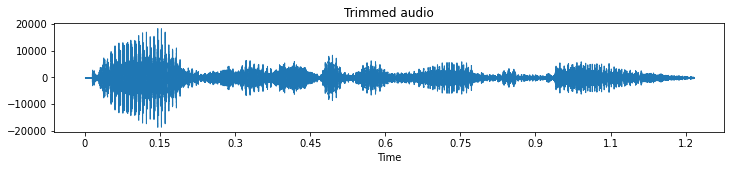

In [26]:
# Trimming the audio to remover silence before and after speech
trimmed_audio, index = librosa.effects.trim(normal_audio, top_db=30)

plt.figure(figsize=(12, 2))
librosa.display.waveshow(trimmed_audio, sr)
plt.title('Trimmed audio')

ipd.display(ipd.Audio(data=trimmed_audio, rate=sr))

/var/folders/y6/4njssq5s2_764zsxh2lpvlvm0000gn/T/ipykernel_3815/1338604850.py:8: FutureWarning: Pass sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(padded_audio, sr)


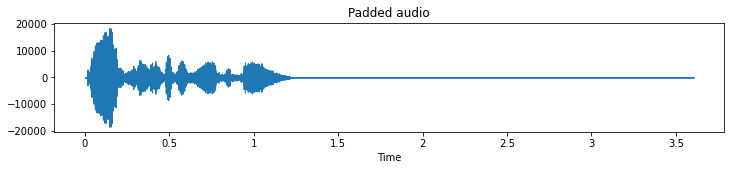

In [27]:
# Padding some values to right side to make all data length equal
# so we have maximum lenght audio file with 173056

padded_audio = np.pad(trimmed_audio, (0, 173056 - len(trimmed_audio)),
                      'constant')

plt.figure(figsize=(12, 2))
librosa.display.waveshow(padded_audio, sr)
plt.title('Padded audio')

ipd.display(ipd.Audio(data=padded_audio, rate=sr))

/var/folders/y6/4njssq5s2_764zsxh2lpvlvm0000gn/T/ipykernel_3815/610437427.py:5: FutureWarning: Pass sr=48000 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  librosa.display.waveshow(final_audio, sr)


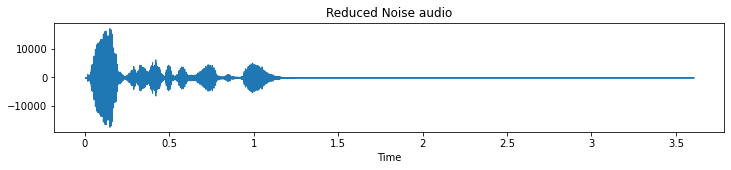

In [28]:
# Eliminating noise from audio by performing Noise Reduction
final_audio = nr.reduce_noise(padded_audio, sr)

plt.figure(figsize=(12, 2))
librosa.display.waveshow(final_audio, sr)
plt.title('Reduced Noise audio')

ipd.display(ipd.Audio(data=final_audio, rate=sr))

# Feature Selection For Single File

Energy shape: (1, 339)
ZCR shape: (1, 339)
MFCCs shape: (20, 339)
Spectral Centroid shape: (1, 339)
chroma feature shape: (12, 339)


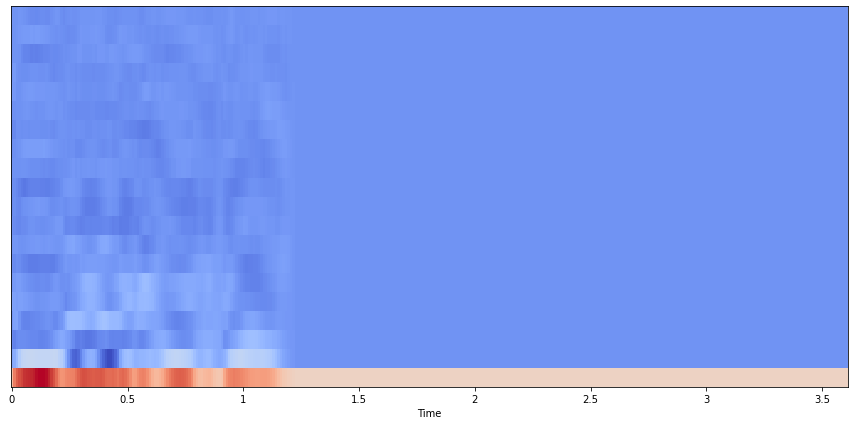

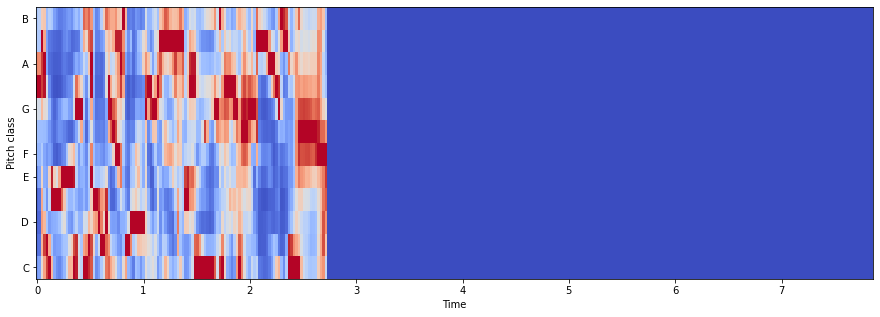

In [29]:
f1 = librosa.feature.rms(y=final_audio)  # Energy - Root Mean Square (RMS)
print('Energy shape:', f1.shape)

f2 = librosa.feature.zero_crossing_rate(
    y=final_audio)  # Zero Crossed Rate (ZCR)
print('ZCR shape:', f2.shape)

f3 = librosa.feature.mfcc(y=final_audio, sr=sr)  # MFCCs
print('MFCCs shape:', f3.shape)
plt.figure(figsize=(15, 7))
librosa.display.specshow(f3, sr=sr, x_axis='time')

f4 = librosa.feature.spectral_centroid(y=final_audio,
                                       sr=sr)  # pectral centroid
print('Spectral Centroid shape:', f4.shape)

f5 = librosa.feature.chroma_stft(y=final_audio, sr=sr)  # chroma feature
print('chroma feature shape:', f5.shape)
plt.figure(figsize=(15, 5))
librosa.display.specshow(f5, x_axis='time', y_axis='chroma', cmap='coolwarm')